<h2 align="center">Intro to Data Science</h2> 
<h3 align="center">Project 2: Logistic Regression Analysis</h3> 

<h3 align="center">Chunwang Yuan, Rajendra Kumar Vechalapu, Saketh Yelamarthi<br>Fall 2021</h3> 

<center>


### Outline
1. Abstract
2. Theory
3. Exploratory Data analysis
4. Analysis Results & Explanation
5. Conclusion

###  1 Abstract 

The main aim of this project is to perform logistic regression analysis on the given data set that represents whether a given e-mail is spam or not spam. The dataset contains 20 features that are used to determine whether an e-mail is spam or not spam. Before performing logistic regression, we perform feature elimination so that significant feature sets are used in model analysis. After modeling the data, we iterate the model for various threshold probability values and check the values of sensitivity and specificity for various thresholds. 

Therefore, our goal is to find the optimal threshold value for which the true positive rate is close to 1 so that we build an optimum classification model that classifies a spam e-mail from ham.


### 2 Theory

Logistic Regression falls under Supervised Learning technique and is a type of regression that contains categorical response and one or multiple numerical and/or categorical predictors. It uses a generalized linear model to model a binart categorical variable using numerical and categorical predictors. Assuming the binomial distribution producing the outcome variable and therefore want to model p the probability of success for a given set of predictors.

There are various options but of all Logit function is used in this particular model.Logit function is defined as logarithm of p over (1-p) for p lies between 0 and 1.

In this particular dataset, we analyze email which are categorized into spam or not spam. This dataset uses 20 features to determine whether the given email is spam or not. We fit the model with the given data and plot the summary. From the summary table, we discard the features whose p-value lies below the significance level i.e., below 5%. By doing this, we are performing feature elimination. After performing feature elimination we are left with the significant features which are useful in determining the classification output.

After building the model, we iterate the model for various threshold probability values and check the values of True Positive, True Negative, False Positive and False Negative. From these values we calculate Sensitivity and Specificity. And we plot the graph of sensitivity and specificity.

From this, we find True positivity rate and False positivity rate and plot the graph of these values. The plotted curve should lie above the random case curve.

This plotted curve is called ROC curve-Receiver Operating Characteristic curve. From this curve, we find the optimal threshold probability value. We find this by determining the point on the ROC curve that is close to 1 i.e., the value of true positive rate is close to 1. The ideal point is that which has TPR value of 1 and FPR value of 0. So we choose the point which is close to the ideal point.

### 3 Exploratory Data analysis
#### In this section, we created a logistic regression model to explorate the data. 

In [3]:
import pandas as pd 
import numpy as np
import statsmodels.api as sm 
from patsy import dmatrices
import matplotlib.pyplot as plt
import seaborn as sns

#### Firstly, we load the data as the dataframe type set. 

In [35]:
df = pd.read_csv('DSCI6002_prj2_data.csv')
df.head()

,spam,to_multiple,from,cc,sent_email,time,image,attach,dollar,winner,...,viagra,password,num_char,line_breaks,format,re_subj,exclaim_subj,urgent_subj,exclaim_mess,number
0,0,0,1,0,0,2011-12-31 22:16:41,0,0,0,no,...,0,0,11.370,202,1,0,0,0,0,big
1,0,0,1,0,0,2011-12-31 23:03:59,0,0,0,no,...,0,0,10.504,202,1,0,0,0,1,small
2,0,0,1,0,0,2012-01-01 08:00:32,0,0,4,no,...,0,0,7.773,192,1,0,0,0,6,small
3,0,0,1,0,0,2012-01-01 01:09:49,0,0,0,no,...,0,0,13.256,255,1,0,0,0,48,small
4,0,0,1,0,0,2012-01-01 02:00:01,0,0,0,no,...,0,2,1.231,29,0,0,0,0,1,none


In [5]:
df.shape

(3921, 21)

In [6]:
df.dtypes

spam              int64
to_multiple       int64
from              int64
cc                int64
sent_email        int64
time             object
image             int64
attach            int64
dollar            int64
winner           object
inherit           int64
viagra            int64
password          int64
num_char        float64
line_breaks       int64
format            int64
re_subj           int64
exclaim_subj      int64
urgent_subj       int64
exclaim_mess      int64
number           object
dtype: object

#### Since the data type of the column of 'time' is object, we need to convert the value from object to numeric.

In [41]:
df['time'] = pd.to_datetime(df['time'])
df['time'] = pd.to_numeric(df['time'])

#### Because the title of 'from' column is one of keywords, we need change the title. 

In [42]:
df['from_'] = df['from']

In [43]:
df.head()

,spam,to_multiple,from,cc,sent_email,time,image,attach,dollar,winner,...,password,num_char,line_breaks,format,re_subj,exclaim_subj,urgent_subj,exclaim_mess,number,from_
0,0,0,1,0,0,1325369801000000000,0,0,0,no,...,0,11.370,202,1,0,0,0,0,big,1
1,0,0,1,0,0,1325372639000000000,0,0,0,no,...,0,10.504,202,1,0,0,0,1,small,1
2,0,0,1,0,0,1325404832000000000,0,0,4,no,...,0,7.773,192,1,0,0,0,6,small,1
3,0,0,1,0,0,1325380189000000000,0,0,0,no,...,0,13.256,255,1,0,0,0,48,small,1
4,0,0,1,0,0,1325383201000000000,0,0,0,no,...,2,1.231,29,0,0,0,0,1,none,1


### General Model

#### Data Preparation: using all the columns of dataset 

In [44]:
y1 , X1 = dmatrices('spam~ to_multiple + cc + from_ + sent_email + time + \
                    image + attach + dollar + C(winner) + inherit + \
                    viagra + password + num_char + line_breaks + format + \
                    re_subj + exclaim_subj + urgent_subj + exclaim_mess + C(number)', df , return_type = 'dataframe')
X1

,Intercept,C(winner)[T.yes],C(number)[T.none],C(number)[T.small],to_multiple,cc,from_,sent_email,time,image,...,inherit,viagra,password,num_char,line_breaks,format,re_subj,exclaim_subj,urgent_subj,exclaim_mess
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.325370e+18,0.0,...,0.0,0.0,0.0,11.370,202.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.325373e+18,0.0,...,0.0,0.0,0.0,10.504,202.0,1.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.325405e+18,0.0,...,1.0,0.0,0.0,7.773,192.0,1.0,0.0,0.0,0.0,6.0
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.325380e+18,0.0,...,0.0,0.0,0.0,13.256,255.0,1.0,0.0,0.0,0.0,48.0
4,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.325383e+18,0.0,...,0.0,0.0,2.0,1.231,29.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3916,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.333127e+18,0.0,...,0.0,0.0,0.0,0.332,12.0,0.0,0.0,0.0,0.0,0.0
3917,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.333178e+18,0.0,...,0.0,0.0,0.0,0.323,15.0,0.0,0.0,0.0,0.0,0.0
3918,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.333099e+18,0.0,...,0.0,0.0,0.0,8.656,208.0,1.0,0.0,0.0,0.0,5.0
3919,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.332925e+18,0.0,...,0.0,0.0,0.0,10.185,132.0,0.0,0.0,0.0,0.0,0.0


In [48]:
logit_res1 = sm.Logit(y1, X1).fit()
print(logit_res1.summary())

         Current function value: 0.208584
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                   spam   No. Observations:                 3921
Model:                          Logit   Df Residuals:                     3899
Method:                           MLE   Df Model:                           21
Date:                Fri, 03 Dec 2021   Pseudo R-squ.:                  0.3288
Time:                        11:31:09   Log-Likelihood:                -817.86
converged:                      False   LL-Null:                       -1218.6
Covariance Type:            nonrobust   LLR p-value:                4.446e-156
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           -100.4727    151.207     -0.664      0.506    -396.834     195.888
C(winner)[T.yes]       2.0711      0.365 

D:\program\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


#### Removing the columns (cc, from_, sent_email, viagra, exclaim_subj ) that have a zero beta with big probability. 

In [49]:
y2 , X2 = dmatrices('spam~ to_multiple + time + image + attach + dollar + C(winner) + inherit + \
                    password + num_char + line_breaks + format + \
                    re_subj + urgent_subj + exclaim_mess + C(number)', df , return_type = 'dataframe')
X2

,Intercept,C(winner)[T.yes],C(number)[T.none],C(number)[T.small],to_multiple,time,image,attach,dollar,inherit,password,num_char,line_breaks,format,re_subj,urgent_subj,exclaim_mess
0,1.0,0.0,0.0,0.0,0.0,1.325370e+18,0.0,0.0,0.0,0.0,0.0,11.370,202.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,1.325373e+18,0.0,0.0,0.0,0.0,0.0,10.504,202.0,1.0,0.0,0.0,1.0
2,1.0,0.0,0.0,1.0,0.0,1.325405e+18,0.0,0.0,4.0,1.0,0.0,7.773,192.0,1.0,0.0,0.0,6.0
3,1.0,0.0,0.0,1.0,0.0,1.325380e+18,0.0,0.0,0.0,0.0,0.0,13.256,255.0,1.0,0.0,0.0,48.0
4,1.0,0.0,1.0,0.0,0.0,1.325383e+18,0.0,0.0,0.0,0.0,2.0,1.231,29.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3916,1.0,0.0,0.0,1.0,0.0,1.333127e+18,0.0,0.0,0.0,0.0,0.0,0.332,12.0,0.0,0.0,0.0,0.0
3917,1.0,0.0,0.0,1.0,0.0,1.333178e+18,0.0,0.0,1.0,0.0,0.0,0.323,15.0,0.0,0.0,0.0,0.0
3918,1.0,0.0,0.0,1.0,1.0,1.333099e+18,0.0,0.0,0.0,0.0,0.0,8.656,208.0,1.0,0.0,0.0,5.0
3919,1.0,0.0,0.0,1.0,1.0,1.332925e+18,0.0,0.0,0.0,0.0,0.0,10.185,132.0,0.0,0.0,0.0,0.0


In [50]:
logit_res2 = sm.Logit(y2, X2).fit()
print(logit_res2.summary())

Optimization terminated successfully.
         Current function value: 0.228731
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                   spam   No. Observations:                 3921
Model:                          Logit   Df Residuals:                     3904
Method:                           MLE   Df Model:                           16
Date:                Fri, 03 Dec 2021   Pseudo R-squ.:                  0.2640
Time:                        11:31:11   Log-Likelihood:                -896.85
converged:                       True   LL-Null:                       -1218.6
Covariance Type:            nonrobust   LLR p-value:                1.353e-126
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            -94.0394     36.311     -2.590      0.010    -165.208     -22.871
C(wi

## Thresholds

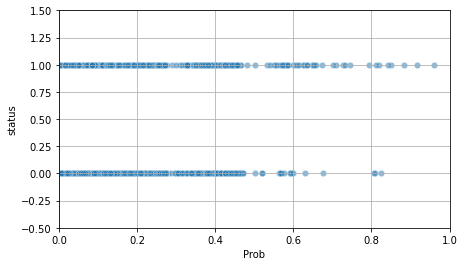

In [51]:
y_pred = logit_res.predict(X2)
df_pred = pd.DataFrame({'Prob': y_pred, 
                       'status': df.spam,
                       })
plt.figure(figsize = (7,4))
sns.scatterplot(data = df_pred, x = 'Prob', y = 'status',
                alpha = 0.5, s = 40)
plt.ylim([-.5, 1.5]); plt.xlim([0,1]);
plt.grid()

### ROC curve

In [52]:
#calculate the tpr and fpr
def calculate_tpr_fpr(df, threshold):
    TP = df_pred[(df_pred.status == 1) & (df_pred.Prob >= threshold)].count()[0]
    FN = df_pred[(df_pred.status == 1) & (df_pred.Prob < threshold)].count()[0]
    TN = df_pred[(df_pred.status == 0) & (df_pred.Prob < threshold)].count()[0]
    FP = df_pred[(df_pred.status == 0) & (df_pred.Prob >= threshold)].count()[0]
    
    sensitivity = TP/(TP + FN)
    specificity = TN/(FP + TN)
    tpr = sensitivity
    fpr = 1- specificity
    return tpr, fpr

tpr_n = []
fpr_n = []
thresholds = [i/100.0 for i in range(0,100)]
for threshold in thresholds:
    tpr, fpr = calculate_tpr_fpr(df, threshold)
    tpr_n.append(tpr)
    fpr_n.append(fpr)

In [53]:
tpr_n = np.flip(tpr_n)
fpr_n = np.flip(fpr_n)

AUC: 0.8605888287978851


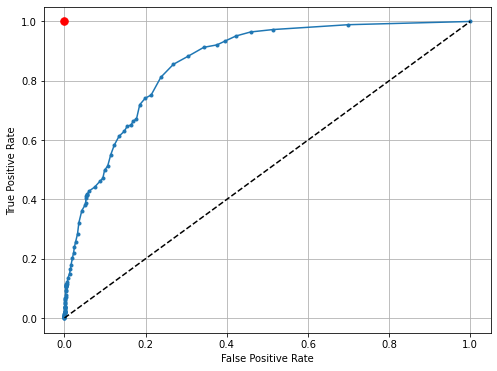

In [54]:
auc = np.trapz(tpr_n, fpr_n)
print("AUC: {}".format(auc))

plt.figure(figsize = (8,6))
plt.plot(fpr_n, tpr_n, '.-')
plt.plot([0,1], [0,1], 'k--')
plt.plot([0], [1], 'r.', markersize = 15)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()

### Optimal point in ROC curve

In [55]:
import math

# shortest distance between best point and point on curve
best_point= (.0, 1.0)
distances = []
for i in zip(fpr_n, tpr_n):
    distance = math.dist(best_point, i)
    distances.append(distance)

min_idx = np.argmin(distances)
print("index of min:\t{}\n"
         "threshold:\t{:2}\n"
         "fpr:\t\t{:.2}\n"
         "tpr:\t\t{:.2}".format(
         min_idx,
         thresholds[99-min_idx],
         fpr_n[min_idx],
         tpr_n[min_idx
              ]))


index of min:	89
threshold:	0.1
fpr:		0.24
tpr:		0.81


### 4 Analysis Results & Explanation

**RESULTS**:

In [56]:
print(logit_res1.summary())

                           Logit Regression Results                           
Dep. Variable:                   spam   No. Observations:                 3921
Model:                          Logit   Df Residuals:                     3899
Method:                           MLE   Df Model:                           21
Date:                Fri, 03 Dec 2021   Pseudo R-squ.:                  0.3288
Time:                        11:32:28   Log-Likelihood:                -817.86
converged:                      False   LL-Null:                       -1218.6
Covariance Type:            nonrobust   LLR p-value:                4.446e-156
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           -100.4727    151.207     -0.664      0.506    -396.834     195.888
C(winner)[T.yes]       2.0711      0.365      5.672      0.000       1.355       2.787
C(number)[T.none]   

In [57]:
print(logit_res2.summary())

                           Logit Regression Results                           
Dep. Variable:                   spam   No. Observations:                 3921
Model:                          Logit   Df Residuals:                     3904
Method:                           MLE   Df Model:                           16
Date:                Fri, 03 Dec 2021   Pseudo R-squ.:                  0.2640
Time:                        11:32:29   Log-Likelihood:                -896.85
converged:                       True   LL-Null:                       -1218.6
Covariance Type:            nonrobust   LLR p-value:                1.353e-126
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            -94.0394     36.311     -2.590      0.010    -165.208     -22.871
C(winner)[T.yes]       2.1489      0.361      5.949      0.000       1.441       2.857
C(number)[T.none]   

AUC: 0.8605888287978851


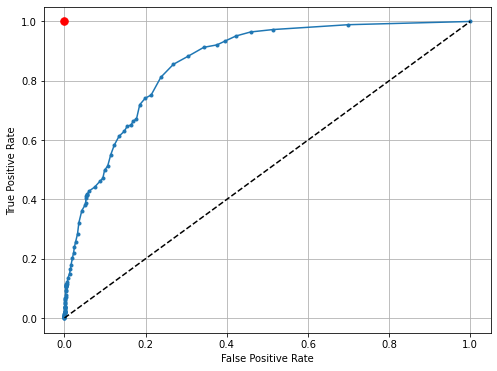

In [60]:
print("AUC: {}".format(auc))
plt.figure(figsize = (8,6))
plt.plot(fpr_n, tpr_n, '.-')
plt.plot([0,1], [0,1], 'k--')
plt.plot([0], [1], 'r.', markersize = 15)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()

In [58]:
print("index of min:\t{}\n"
         "optimal threshold:\t{:2}\n"
         "fpr:\t\t{:.2}\n"
         "tpr:\t\t{:.2}".format(
         min_idx,
         thresholds[99-min_idx],
         fpr_n[min_idx],
         tpr_n[min_idx
              ]))

index of min:	89
optimal threshold:	0.1
fpr:		0.24
tpr:		0.81


**ANALYSIS & EXPLANATION:**

1. At the beginning of this analysis with logistic regression method, we applyed all the columns to our first logistic regression model to detect the columns that have zero coefficient in our model. 
From the details of logit_res1.summary(), it given us a specifical result that P-values of five columns of cc, from_, sent_email, viagra and exclaim_subj were far more than alpha(0.05) and P-values of rest columns was less than alpha. For those P-values were significantly more than 0.05, we can't reject Null Hypothesis and concluded that the coefficient values of those columns were 0. 

2. Since we concluded the the coefficient values of five columns of cc, from_, sent_email, viagra and exclaim_subj were 0, we removed those columns and applyed rest of columns into our second model to make a further detection.
The informations of logit_res2.summary() revealed the P-value of remained columns were less than 0.05. We rejected the Null Hypothesis and concluded that the coefficient values of those columns were not 0. 

3. Based on the Roc curve, the second logistic regression model got AUC of 0.86. Such high AUC illustrated that the model is splendid and accurate for the dataset. 

4. Using the method to find the shortest distance between best point and point on curve, the optimal point was (fpr: 0.24, tpr: 0.81) corresponding to the optimal threshold of 0.1.

### 5 Conclusion

#### According to the results of logistic regression analysis, we can conclude the five columns of cc, from_, sent_email, viagra and exclaim_subj didn't relate to the target column. 

#### By applying the rest columns into our model, we can predict the email is spam(1) or not(0) with a accuracy of 0.81 at 1 and a accuracy of 0.76 at 0. 